<a href="https://colab.research.google.com/github/eduardobart/data_engineer_essentials/blob/master/Noverde_Eduardo_Bartolomeu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
 !apt-get clean
 !rm -rf /var/lib/apt/lists/*
 !apt-get clean
 !apt-get update 
 !apt-get upgrade

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic InRelease [242 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic In

In [19]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [20]:
!wget -q https://archive.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz

In [21]:
!tar xf spark-2.4.1-bin-hadoop2.7.tgz

In [22]:
!pip install -q findspark
!pip install -q pyspark

In [24]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.1-bin-hadoop2.7"

In [25]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [26]:
from pyspark.sql import SQLContext

In [28]:
df_loans = spark.read.csv("/content/Datasets/loans_sample.csv", header=True, inferSchema=True)

In [29]:
df_loans.printSchema()

root
 |-- loan_id: integer (nullable = true)
 |-- period: integer (nullable = true)
 |-- accepted_at: timestamp (nullable = true)
 |-- payday: integer (nullable = true)
 |-- interest_rate: double (nullable = true)



In [30]:
df_loans.describe().show()

+-------+-----------------+------------------+------------------+------------------+
|summary|          loan_id|            period|            payday|     interest_rate|
+-------+-----------------+------------------+------------------+------------------+
|  count|              788|               788|               788|               788|
|   mean|            393.5| 11.40989847715736|17.804568527918782| 6.980647208121897|
| stddev|227.6202978646676|1.6165451701117575| 7.066745102572057|1.4814822970928707|
|    min|                0|                 6|                 5|              3.12|
|    max|              787|                12|                25|              8.01|
+-------+-----------------+------------------+------------------+------------------+



In [32]:
df_loans.select(df_loans.columns).show(10)

+-------+------+--------------------+------+-------------+
|loan_id|period|         accepted_at|payday|interest_rate|
+-------+------+--------------------+------+-------------+
|      0|    12|2017-05-17 16:48:...|    25|         3.12|
|      1|    12|2017-05-19 03:12:...|    25|         7.55|
|      2|    12|2017-05-24 13:22:...|    25|         7.55|
|      3|    12|2017-05-21 23:51:...|     5|         7.55|
|      4|     9|2017-05-18 08:07:...|    15|         7.49|
|      5|    12|2017-05-20 08:39:...|    25|         3.12|
|      6|     9|2017-05-17 07:48:...|    15|         7.49|
|      7|    12|2017-05-23 14:16:...|     5|         7.55|
|      8|    12|2017-05-16 16:17:...|    15|         7.55|
|      9|    12|2017-05-21 17:47:...|    15|         7.55|
+-------+------+--------------------+------+-------------+
only showing top 10 rows



In [169]:
df_payments = spark.read.format('parquet').load('/content/Datasets/payments_sample.parquet')

In [34]:
df_payments.describe().show()

+-------+------------------+------------------+--------------+--------------------+------------------+
|summary|           loan_id|    installment_id|payment_method|          payment_id|       paid_amount|
+-------+------------------+------------------+--------------+--------------------+------------------+
|  count|              5622|              5622|          5622|                5622|              5622|
|   mean| 394.4224475275703| 4725.355211668445|          null|                null|460.15150124510484|
| stddev|226.77114780266456|2646.3912996392514|          null|                null|231.03905591125778|
|    min|                 0|                 0|        boleto|0001c60e-be8c-4b8...|            178.46|
|    max|               787|              8837|           ted|ffffb94b-4dc8-40a...|           1923.32|
+-------+------------------+------------------+--------------+--------------------+------------------+



In [35]:
df_payments.select(df_payments.columns).show()

+-------+--------------+------------+--------------+--------------------+-----------+
|loan_id|installment_id|payment_date|payment_method|          payment_id|paid_amount|
+-------+--------------+------------+--------------+--------------------+-----------+
|    291|             0|  2017-06-01|    creditcard|8ad9e0e5-a232-477...|     454.94|
|    291|             1|  2017-07-03|           ted|e747c7f0-bd95-4ac...|     454.94|
|    291|             2|  2017-07-23|           ted|35734218-a71f-411...|     454.94|
|    291|             3|  2017-10-19|        boleto|1c957990-5245-41e...|     462.94|
|    291|             5|  2018-05-14|    creditcard|4389d87f-570a-4a7...|     456.94|
|    291|             6|  2017-12-05|    creditcard|91bdae2d-f1ba-40a...|     454.94|
|    291|             7|  2017-11-19|           ted|46410647-eb71-49b...|     457.94|
|    291|             8|  2018-01-23|    creditcard|abc5cefe-0c08-481...|     454.94|
|    291|             9|  2018-04-12|           ted|77

'

In [170]:
from pyspark.sql.types import ArrayType, StructField, StructType, StringType, IntegerType, DateType, DataType

In [38]:
schema = StructType([
      StructField("installment_id",StringType(),True),
      StructField("loan_id",StringType(),True),
      StructField("number",StringType(),True),
      StructField("due_date",StringType(),True),
      StructField("installment_value",StringType(),True)
])

In [39]:
df_installments = spark.read.json('/content/Datasets/installments_sample.json', schema=schema)

In [40]:
df_installments.show()

+--------------+-------+------+--------+-----------------+
|installment_id|loan_id|number|due_date|installment_value|
+--------------+-------+------+--------+-----------------+
|          null|   null|  null|    null|             null|
+--------------+-------+------+--------+-----------------+



In [41]:
df_installments.printSchema()

root
 |-- installment_id: string (nullable = true)
 |-- loan_id: string (nullable = true)
 |-- number: string (nullable = true)
 |-- due_date: string (nullable = true)
 |-- installment_value: string (nullable = true)



In [42]:
df_installments = spark.read.json('/content/Datasets/installments_sample_without_header.json')

Tive que tirar o header do JSON para a leitura acontecer


In [171]:
df_installments = spark.read.json ('/content/Datasets/installments_sample_without_header_tratado.json')

In [172]:
df_installments.show()

+--------------------+--------------+-----------------+-------+------+
|            due_date|installment_id|installment_value|loan_id|number|
+--------------------+--------------+-----------------+-------+------+
|2017-06-12T00:00:...|             0|           454.94|    291|     1|
|2017-07-12T00:00:...|             1|           454.94|    291|     2|
|2017-08-12T00:00:...|             2|           454.94|    291|     3|
|2017-10-12T00:00:...|             3|           454.94|    291|     5|
|2017-09-12T00:00:...|             4|           454.94|    291|     4|
|2018-05-12T00:00:...|             5|           454.94|    291|    12|
|2017-12-12T00:00:...|             6|           454.94|    291|     7|
|2017-11-12T00:00:...|             7|           454.94|    291|     6|
|2018-02-12T00:00:...|             8|           454.94|    291|     9|
|2018-04-12T00:00:...|             9|           454.94|    291|    11|
|2018-01-12T00:00:...|            10|           454.94|    291|     8|
|2018-

Tive também que trocar as vírgulas por quebras de linha.


In [173]:
from pyspark.sql.functions import create_map

In [174]:
df_installments = df_installments.withColumn('due_date_sub', df_installments.due_date.substr(1, 10))

In [175]:
df_installments = df_installments.withColumn('map',create_map('number', 'due_date_sub').alias("map"))

In [177]:
df_installments.show()

+--------------------+--------------+-----------------+-------+------+------------+------------------+
|            due_date|installment_id|installment_value|loan_id|number|due_date_sub|               map|
+--------------------+--------------+-----------------+-------+------+------------+------------------+
|2017-06-12T00:00:...|             0|           454.94|    291|     1|  2017-06-12| [1 -> 2017-06-12]|
|2017-07-12T00:00:...|             1|           454.94|    291|     2|  2017-07-12| [2 -> 2017-07-12]|
|2017-08-12T00:00:...|             2|           454.94|    291|     3|  2017-08-12| [3 -> 2017-08-12]|
|2017-10-12T00:00:...|             3|           454.94|    291|     5|  2017-10-12| [5 -> 2017-10-12]|
|2017-09-12T00:00:...|             4|           454.94|    291|     4|  2017-09-12| [4 -> 2017-09-12]|
|2018-05-12T00:00:...|             5|           454.94|    291|    12|  2018-05-12|[12 -> 2018-05-12]|
|2017-12-12T00:00:...|             6|           454.94|    291|     7|  2

In [178]:
df_installments = df_installments.withColumnRenamed('loan_id', 'loan_id_installment')

In [179]:
df_parquet_final = df_loans.join(df_installments, df_loans.loan_id == df_installments.loan_id_installment,how='left')

In [180]:
df_parquet_final.show()

+-------+------+--------------------+------+-------------+--------------------+--------------+-----------------+-------------------+------+------------+------------------+
|loan_id|period|         accepted_at|payday|interest_rate|            due_date|installment_id|installment_value|loan_id_installment|number|due_date_sub|               map|
+-------+------+--------------------+------+-------------+--------------------+--------------+-----------------+-------------------+------+------------+------------------+
|      0|    12|2017-05-17 16:48:...|    25|         3.12|2018-06-01T00:00:...|          2599|           494.27|                  0|    12|  2018-06-01|[12 -> 2018-06-01]|
|      0|    12|2017-05-17 16:48:...|    25|         3.12|2018-05-02T00:00:...|          2598|           494.27|                  0|    11|  2018-05-02|[11 -> 2018-05-02]|
|      0|    12|2017-05-17 16:48:...|    25|         3.12|2018-04-01T00:00:...|          2597|           494.27|                  0|    10| 

In [181]:
df_parquet_final.createOrReplaceTempView('df_parquet_final_temp')

In [182]:
df_payments.createOrReplaceTempView('df_payments_temp')

In [183]:
df_installments.createOrReplaceTempView('df_installments_temp')

In [184]:
query = '''SELECT L.loan_id, L.period, L.accepted_at, L.payday, L.interest_rate, L.map as installments, (SELECT collect_list(struct(payment_id as id, payment_date, payment_method, paid_amount as amount)) FROM df_payments_temp P WHERE L.loan_id = P.loan_id) payments  FROM df_parquet_final_temp L'''

In [185]:
df_parquet_final = spark.sql(query)

In [186]:
df_parquet_final.show()

+-------+------+--------------------+------+-------------+------------------+--------------------+
|loan_id|period|         accepted_at|payday|interest_rate|      installments|            payments|
+-------+------+--------------------+------+-------------+------------------+--------------------+
|      0|    12|2017-05-17 16:48:...|    25|         3.12|[12 -> 2018-06-01]|[[11eab099-5ca4-4...|
|      0|    12|2017-05-17 16:48:...|    25|         3.12|[11 -> 2018-05-02]|[[11eab099-5ca4-4...|
|      0|    12|2017-05-17 16:48:...|    25|         3.12|[10 -> 2018-04-01]|[[11eab099-5ca4-4...|
|      0|    12|2017-05-17 16:48:...|    25|         3.12| [9 -> 2018-03-04]|[[11eab099-5ca4-4...|
|      0|    12|2017-05-17 16:48:...|    25|         3.12| [8 -> 2018-02-01]|[[11eab099-5ca4-4...|
|      0|    12|2017-05-17 16:48:...|    25|         3.12| [7 -> 2018-01-01]|[[11eab099-5ca4-4...|
|      0|    12|2017-05-17 16:48:...|    25|         3.12| [6 -> 2017-12-02]|[[11eab099-5ca4-4...|
|      0| 

In [187]:
df_parquet_final.createOrReplaceTempView('df_parquet_final_temp')

In [188]:
query = '''
select pqf.*,struct(array(if(pay.payment_id is not null, False, True)) as latency
             ,array(if(pay.payment_id is not null and datediff((SELECT MAX(payment_date) FROM df_payments_temp WHERE loan_id = pay.loan_id), due_date_sub) > 30, False, True)) as over30) as metrics
from df_parquet_final_temp pqf
left join df_installments_temp inst
on inst.loan_id_installment = pqf.loan_id
left join df_payments_temp pay
on inst.loan_id_installment = pay.loan_id and inst.installment_id = pay.installment_id  '''

In [189]:
df_parquet_final = spark.sql(query)

In [190]:
df_parquet_final.show()

+-------+------+--------------------+------+-------------+------------------+--------------------+------------------+
|loan_id|period|         accepted_at|payday|interest_rate|      installments|            payments|           metrics|
+-------+------+--------------------+------+-------------+------------------+--------------------+------------------+
|      0|    12|2017-05-17 16:48:...|    25|         3.12|[12 -> 2018-06-01]|[[11eab099-5ca4-4...|  [[true], [true]]|
|      0|    12|2017-05-17 16:48:...|    25|         3.12|[12 -> 2018-06-01]|[[11eab099-5ca4-4...|  [[true], [true]]|
|      0|    12|2017-05-17 16:48:...|    25|         3.12|[12 -> 2018-06-01]|[[11eab099-5ca4-4...| [[false], [true]]|
|      0|    12|2017-05-17 16:48:...|    25|         3.12|[12 -> 2018-06-01]|[[11eab099-5ca4-4...|  [[true], [true]]|
|      0|    12|2017-05-17 16:48:...|    25|         3.12|[12 -> 2018-06-01]|[[11eab099-5ca4-4...|[[false], [false]]|
|      0|    12|2017-05-17 16:48:...|    25|         3.1

In [191]:
df_parquet_final.printSchema()

root
 |-- loan_id: integer (nullable = true)
 |-- period: integer (nullable = true)
 |-- accepted_at: timestamp (nullable = true)
 |-- payday: integer (nullable = true)
 |-- interest_rate: double (nullable = true)
 |-- installments: map (nullable = true)
 |    |-- key: long
 |    |-- value: string (valueContainsNull = true)
 |-- payments: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- payment_id: string (nullable = true)
 |    |    |-- payment_date: date (nullable = true)
 |    |    |-- payment_method: string (nullable = true)
 |    |    |-- paid_amount: double (nullable = true)
 |-- metrics: struct (nullable = false)
 |    |-- latency: array (nullable = false)
 |    |    |-- element: boolean (containsNull = false)
 |    |-- over30: array (nullable = false)
 |    |    |-- element: boolean (containsNull = false)



Dataframe da tabela final criado!


In [193]:
df_parquet_final.write.parquet('/content/Datasets/loan_documents.parquet')

In [192]:
!rm -rf '/content/Datasets/loan_documents.parquet'

In [ ]:
spark.sql("""
create external table loan_documents (
    loan_id integer ,
    period integer,
    accepted_at timestamp ,
    payday integer,
    interest_rate double,
    installments map<long, string>,
    payments array<struct<id: int, payment_date: string, method: string, amount: double>>,
 metrics struct<latency: array<boolean>, over30: array<boolean>>
)
STORED AS PARQUET
location "/content/Datasets/loan_documents.parquet"
""")

In [195]:
df_parquet_final.createOrReplaceTempView('loan_documents')

**Questões**

1) Para cada mês de 2019*, qual foi a proporção do montante recebido, em relação ao que era esperado? Ex: Vamos supor que em janeiro 2019 recebemos RS 9000, e o valor total devido neste mês era RS 10000, você deve criar uma query que retorne da seguinte forma:
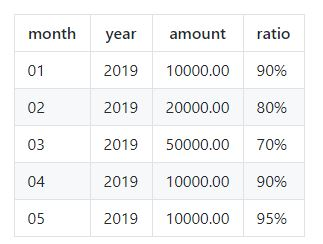


In [196]:
query_exercicio = ''' SELECT month(l.payments[0].payment_date) AS month, year(l.payments[0].payment_date) as year, format_number(sum(payments[0].paid_amount),2) as amount, concat(format_number(sum(payments[0].paid_amount)/(select sum(installment_value) 
                                                                                                  FROM df_installments_temp 
                                                                                                 WHERE year(due_date_sub) = year(l.payments[0].payment_date) 
                                                                                                  and  month(due_date_sub) = month(l.payments[0].payment_date))*100, 0), '%') ratio
FROM loan_documents l
WHERE year(l.payments[0].payment_date)  = 2018
GROUP BY month(l.payments[0].payment_date), year(l.payments[0].payment_date), (select sum(installment_value) 
                                                                                                  FROM df_installments_temp 
                                                                                                 WHERE year(due_date_sub) = year(l.payments[0].payment_date) 
                                                                                                  and  month(due_date_sub) = month(l.payments[0].payment_date))'''



In [197]:
df_questao_1 = spark.sql(query_exercicio)

In [198]:
df_questao_1.printSchema()

root
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- amount: string (nullable = true)
 |-- ratio: string (nullable = true)



In [199]:
df_questao_1.show(10)

+-----+----+----------+-----+
|month|year|    amount|ratio|
+-----+----+----------+-----+
|    6|2018| 74,936.16| 319%|
|    5|2018| 65,322.72|  52%|
|    4|2018|317,653.92| 250%|
|    4|2018|317,653.92| 255%|
|    1|2018|364,010.22| 686%|
|    1|2018|364,010.22| 265%|
|    1|2018|364,010.22| 272%|
|    5|2018| 65,322.72|  67%|
|    3|2018| 86,398.56| 167%|
|    2|2018|474,524.64| 362%|
+-----+----+----------+-----+
only showing top 10 rows



In [202]:
import matplotlib.pyplot as plt

TypeError: ignored

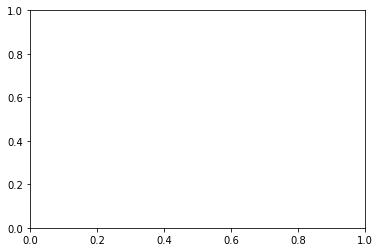

In [203]:
plt.plot(df_questao_1.select('month', 'ratio').collect())

Tomei a liberdade de por par ao ano de 2018, pois há poucos meses em 2019


2)Para cada mês de 2019*, quais eram as características médias da carteira (key portfolio highlights)? Ex: Um investidor deseja saber qual é o prazo médio (avg_period), taxa de juros média (avg_interest_rate) e dia de vencimento mais frequente (freq_payday), e para isso deverá ser construída uma query com os seguintes campos:

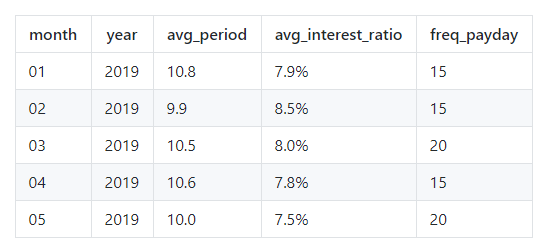

In [204]:
query_exercicio = ''' 
SELECT  month(l.accepted_at) as month, year(l.accepted_at) as year, format_number(avg(period), 1) as avg_period, concat(format_number(avg(interest_rate), 1), '%') as avg_interest_ratio, fqt.payday
from loan_documents l
inner join
(SELECT * FROM 
         (SELECT date_format(accepted_at, 'yMM') ano_mes, payday, COUNT(*),  DENSE_RANK() OVER (PARTITION BY  date_format(accepted_at, 'yMM') ORDER BY COUNT(*) DESC) as rank
            FROM loan_documents 
           GROUP BY payday,  date_format(accepted_at, 'yMM')
         ) WHERE rank = 1
) fqt
 on ano_mes = date_format(l.accepted_at, 'yMM')
where year(l.accepted_at) = 2017
group by month(l.accepted_at), year(l.accepted_at),fqt.payday   '''

In [205]:
df_questao_2 = spark.sql(query_exercicio)



In [206]:
df_questao_2.show()

+-----+----+----------+------------------+------+
|month|year|avg_period|avg_interest_ratio|payday|
+-----+----+----------+------------------+------+
|    9|2017|      12.0|              7.5%|    25|
|    4|2017|      11.7|              6.8%|    15|
|    5|2017|      11.8|              7.1%|    25|
|    6|2017|      11.8|              6.9%|    15|
+-----+----+----------+------------------+------+



3) Para o portfolio como um todo, como se dá a distribuição dos contratos entre os diferentes prazos e taxas? Ex: Do total de contratos (loan_id), quantos possuem 6 meses de duração e taxa de 5.74%, ou 12 meses de duração e 5.15% de juros? A query deve retornar uma matriz semelhante a exemplificada abaixo:

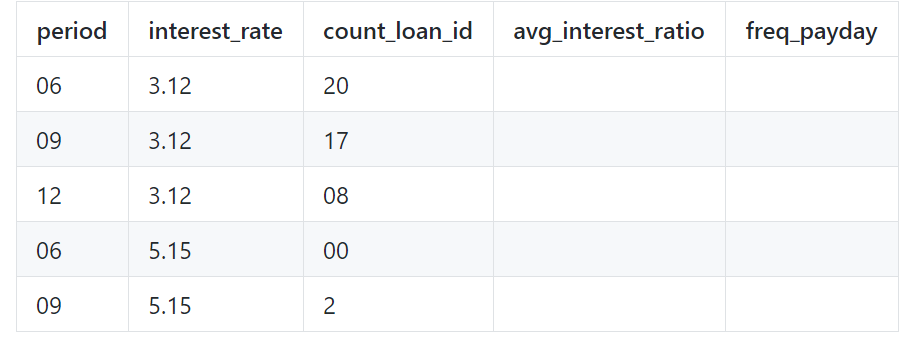

In [207]:
query_exercicio = ''' SELECT L.period, L.interest_rate, count(L.loan_id) as count_loan_id, concat(format_number(avg(l.interest_rate), 1), '%')  as avg_interest_ratio
                   , fqt.payday as fraq_payday
                     FROM 
                      loan_documents L
                     INNER JOIN 
                     (SELECT * FROM 
                      (SELECT interest_rate, period,payday, COUNT(*),  DENSE_RANK() OVER (PARTITION BY  interest_rate, period ORDER BY COUNT(*) DESC) as rank
                        FROM loan_documents 
                       GROUP BY payday,  interest_rate, period
                      ) WHERE rank = 1) fqt
                     on l.period = fqt.period and l.interest_rate = fqt.interest_rate
                    group by L.period, L.interest_rate, fqt.payday'''
                          

In [208]:
df_questao_3 = spark.sql(query_exercicio)

In [209]:
df_questao_3.show()

+------+-------------+-------------+------------------+-----------+
|period|interest_rate|count_loan_id|avg_interest_ratio|fraq_payday|
+------+-------------+-------------+------------------+-----------+
|    12|         3.12|        11954|              3.1%|         25|
|     6|         3.68|          360|              3.7%|         15|
|     9|         3.25|          405|              3.2%|         15|
|     9|         5.23|           81|              5.2%|         25|
|    12|         5.15|         1296|              5.1%|         15|
|    12|         7.55|        83530|              7.6%|         15|
|     6|         8.01|         1440|              8.0%|         25|
|     9|         7.49|         3565|              7.5%|         25|
|     6|         5.74|           72|              5.7%|         25|
|     6|         5.74|           72|              5.7%|         15|
|    12|         7.49|          144|              7.5%|         15|
+------+-------------+-------------+------------

In [265]:
df_questao_3.createOrReplaceTempView('df_questao_3_temp_to_plot')

In [267]:
df_questao_3_to_plot = spark.sql('select * from df_questao_3_temp_to_plot')

In [268]:
pd_questao_3 = df_questao_3_to_plot.toPandas()


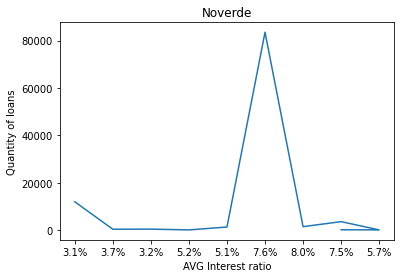

In [275]:
plt.plot( pd_questao_3['avg_interest_ratio'], pd_questao_3['count_loan_id'])
plt.title('Noverde')
plt.xlabel('AVG Interest ratio')
plt.ylabel('Quantity of loans')
plt.show()


4) Qual a proporção de empréstimos maturados da carteira (vencimento da primeira parcela ocorreu há pelo menos 30 dias) que estão hoje com Over30 = TRUE? Ex: Vamos supor que a carteira está crescendo rapidamente, chegando a um total de 15.000 contratos (loan_id), sendo que apenas 10.000 já passaram pelo primeiro vencimento há pelo menos 30 dias e 3.500 encontram-se em atraso. Sua query deverá retornar o seguinte resultado:

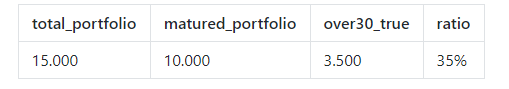

Assumi a data 01/01/2019 para referência de atraso


In [259]:
query_exercicio = ''' SELECT *, concat(format_number((over30_true*100/matured_portolio), 2), '%') as ratio FROM (
                      SELECT COUNT(loan_id) as total_portolio
                    , (SELECT count(*) FROM loan_documents where map_keys(installments)[0] = 1 and date_add(map_values(installments)[0], 30) < '2019-01-01') as matured_portolio
                    , (SELECT COUNT(*) FROM loan_documents WHERE metrics.over30[0] = True and map_keys(installments)[0] = 1 and date_add(map_values(installments)[0], 30) < '2019-01-01') as over30_true
                        FROM loan_documents) '''

In [260]:
df_questao_4 = spark.sql(query_exercicio)

In [261]:
df_questao_4.show()

+--------------+----------------+-----------+------+
|total_portolio|matured_portolio|over30_true| ratio|
+--------------+----------------+-----------+------+
|        102847|            8826|       4389|49.73%|
+--------------+----------------+-----------+------+

